In [3]:
from sympy import *
from sympy.matrices import *
init_printing()

def rotz(theta):
    H = Matrix([[cos(theta), -sin(theta), 0, 0], 
                [sin(theta), cos(theta), 0, 0], 
                [0,0,1,0],
                [0,0,0,1]])
    return H

def roty(theta):
    H = Matrix([[cos(theta), 0, sin(theta), 0], 
                [0,1,0,0],
                [-sin(theta), 0, cos(theta), 0], 
                [0,0,0,1]])
    return H

def rotx(theta):
    H = Matrix([[1,0,0,0],
                [0, cos(theta), -sin(theta), 0], 
                [0, sin(theta), cos(theta), 0], 
                [0,0,0,1]])
    return H

def Dx(d):
    H = Matrix([[1, 0, 0, d], 
               [0, 1, 0, 0], 
               [0, 0, 1, 0],
               [0, 0, 0, 1]])
    return H

def Dy(d):
    H = Matrix([[1, 0, 0, 0], 
               [0, 1, 0, d], 
               [0, 0, 1, 0],
               [0, 0, 0, 1]])
    return H

def Dz(d):
    H = Matrix([[1, 0, 0, 0], 
               [0, 1, 0, 0], 
               [0, 0, 1, d],
               [0, 0, 0, 1]])
    return H

def dh(a, alpha, d, theta):
    ct = cos(theta)
    st = sin(theta)
    ca = cos(alpha)
    sa = sin(alpha)
    H = Matrix([[ct, -st*ca, st*sa, a*ct], 
                [st, ct*ca, -ct*sa, a*st],
                [0, sa, ca, d],
                [0, 0, 0, 1]])
    return H

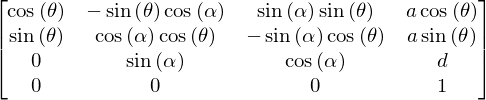

In [4]:
a,alpha,d,theta = symbols("a,\\alpha,d,\\theta")
dh(a,alpha,d,theta)

## Manipulador RR

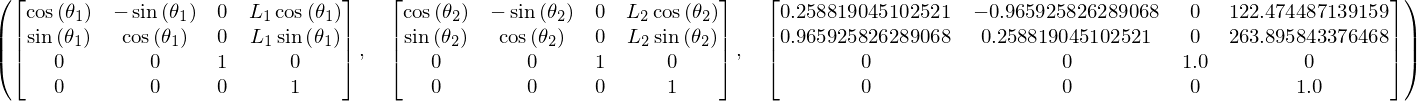

In [11]:
L1, L2 = symbols("L_1, L_2")
t1, t2 = symbols("\\theta_1, \\theta_2")
A1 = dh(L1,0,0,t1)
A2 = dh(L2,0,0,t2)
T20 = A1*A2
A1,A2, simplify( T20.subs({L1:100, L2:200, t1:pi/4, t2:pi/6}).evalf() )

## Gráficas

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

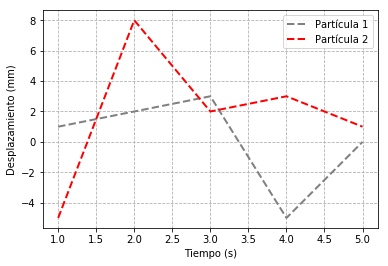

In [48]:
plt.plot([1,2,3,4,5], [1,2,3,-5,0], color=(0.5,0.5,0.5), lw=2, ls="--", label="Partícula 1")
plt.plot([1,2,3,4,5], [-5,8,2,3,1], color=(1,0,0), lw=2, ls="--", label="Partícula 2")
plt.xlabel("Tiempo (s)")
plt.ylabel("Desplazamiento (mm)")
plt.grid(ls="--")
plt.legend()
plt.savefig("gr.png")

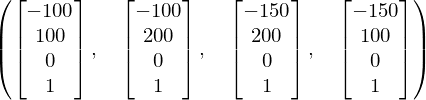

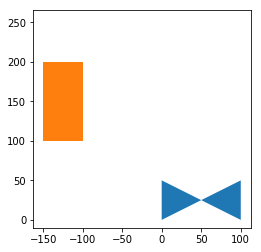

In [71]:
R = rotz(pi/2)*Dx(100)*Dy(100)
A = Matrix([0,0,0,1])
B = Matrix([100,0,0,1])
C = Matrix([100,50,0,1])
D = Matrix([0,50,0,1])
A1 = R*A
B1 = R*B
C1 = R*C
D1 = R*D
plt.fill([A[0], C[0], B[0], D[0]], [A[1], C[1], B[1], D[1]])
plt.fill([A1[0], B1[0], C1[0], D1[0]], [A1[1], B1[1], C1[1], D1[1]])
plt.axis("square")
A1,B1,C1,D1

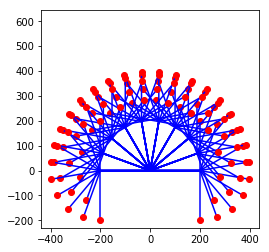

In [109]:
L1, L2 = 200, 200
t1, t2 = symbols("\\theta_1, \\theta_2")
A1 = dh(L1,0,0,t1)
A2 = dh(L2,0,0,t2)
T20 = simplify( A1*A2 )
T10 = A1
O0 = [0,0]


for T1 in np.linspace(0, np.pi, 10):
    for T2 in np.linspace(-np.pi/2, np.pi/2, 10): 
        ths = {t1:T1, t2:T2}
        O1 = T10[:2,3].subs(ths)
        O2 = T20[:2,3].subs(ths)
        plt.plot([O0[0], O1[0], O2[0]], [O0[1], O1[1], O2[1]], "b")
        plt.plot(O2[0], O2[1], "ro")


plt.axis("square");